In [19]:
import random
import math
import matplotlib.pyplot as plt

In [22]:
# función para evaluar la ecuación
def ecuacion(x):
    return 5*x**5 - 3*x**4 - x**3 - 5*x**2 - x - 3

# función de aptitud
def aptitud(x):
    return 1 / (1 + math.fabs(ecuacion(x)))

# función para generar un cromosoma aleatorio
def generar_cromosoma():
    return random.uniform(0.5, 1.5)

# función para generar una población inicial
def generar_poblacion(tamano_poblacion):
    poblacion = []
    for i in range(tamano_poblacion):
        cromosoma = generar_cromosoma()
        poblacion.append(cromosoma)
    return poblacion

# función para seleccionar un par de padres
def seleccion(poblacion):
    padres = random.sample(poblacion, 2)
    return padres

# función para realizar la cruza de dos cromosomas
def cruza(padres):
    punto_cruza = random.uniform(0, 1)
    hijo1 = padres[0] * punto_cruza + padres[1] * (1 - punto_cruza)
    hijo2 = padres[1] * punto_cruza + padres[0] * (1 - punto_cruza)
    return [hijo1, hijo2]

# función para realizar la mutación de un cromosoma
def mutacion(cromosoma):
    tasa_mutacion = 0.1
    if random.uniform(0, 1) < tasa_mutacion:
        cromosoma = random.uniform(0.5, 1.5)
    return cromosoma

# función para encontrar la mejor solución en una población
def mejor_solucion(poblacion):
    mejor = poblacion[0]
    for i in range(1, len(poblacion)):
        if aptitud(poblacion[i]) > aptitud(mejor):
            mejor = poblacion[i]
    return mejor


    return mejor

# función principal del algoritmo genético
def algoritmo_genetico(tamano_poblacion, num_generaciones):
    poblacion = generar_poblacion(tamano_poblacion)
    aptitudes_generacion = []
    for i in range(num_generaciones):
        nueva_poblacion = []
        for j in range(int(tamano_poblacion/2)):
            padres = seleccion(poblacion)
            hijos = cruza(padres)
            hijo1 = mutacion(hijos[0])
            hijo2 = mutacion(hijos[1])
            nueva_poblacion.append(hijo1)
            nueva_poblacion.append(hijo2)
        poblacion = nueva_poblacion
        mejor = mejor_solucion(poblacion)
        aptitudes_generacion.append(aptitud(mejor))
        if ecuacion(mejor) == 0:
            break
    return mejor, aptitudes_generacion

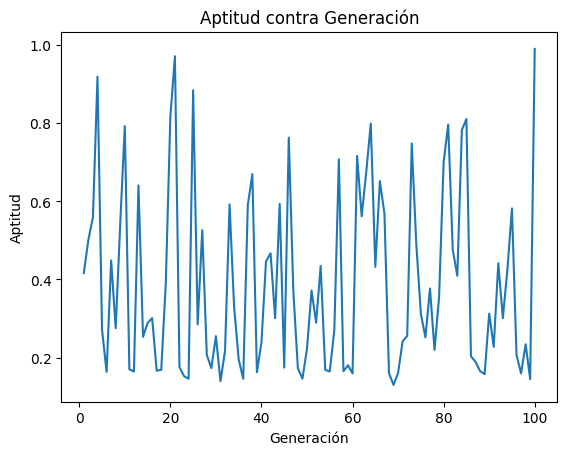

La raíz encontrada es: 1.434439703958052


In [32]:
# ejemplo de uso del algoritmo genético
solucion, aptitudes_generacion = algoritmo_genetico(50, 100)

# Dibujar el cuadro de aptitud contra generación
generaciones = range(1, len(aptitudes_generacion) + 1)
plt.plot(generaciones, aptitudes_generacion)
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.title('Aptitud contra Generación')
plt.show()

print("La raíz encontrada es:", solucion)

Este código almacenará las aptitudes de la mejor solución en cada generación en la lista aptitudes_generacion. Luego, utiliza Matplotlib para trazar el gráfico de aptitud contra generación utilizando plt.plot(). Finalmente, se muestra el gráfico con plt.show().